In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
#latitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#longitues
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#keep the latitudes and longitudes as pairs
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ponta delgada pt
mar del plata ar
ussel fr
anloga gh
katsuura jp
vaini to
hermanus za
busselton au
cidreira br
caohai cn
tondano id
chokurdakh ru
mehamn no
grand river south east mu
ushuaia ar
uyovu tz
cape town za
cayenne gf
karauzyak uz
cidreira br
barentsburg sj
port elizabeth za
thompson ca
haicheng cn
yulara au
ushuaia ar
zima ru
saldanha za
samusu ws
karaul ru
vaini to
gryazi ru
san cristobal ec
thompson ca
vicuna cl
arkhangelsk ru
salalah om
takaka nz
buala sb
aswan eg
bengkulu id
polis cy
mataura pf
mar del plata ar
thompson ca
ushuaia ar
nome us
sao filipe cv
luderitz na
cape town za
urdzhar kz
ruatoria nz
port blair in
rikitea pf
thompson ca
saskylakh ru
oga jp
fortuna us
wlodawa pl
dedougou bf
bluff nz
chagda ru
maragogi br
kontagora ng
kungurtug ru
avarua ck
meulaboh id
pisco pe
longyearbyen sj
mataura pf
bac lieu vn
ushuaia ar
bethel us
rikitea pf
hilo us
great yarmouth gb
valencia ve
luderitz na
hithadhoo mv
punta arenas cl
ancud cl
rundu na
vigrestad no
upernavik gl
moun

makakilo city us
nikolskoye ru
daru pg
majene id
vaini to
butaritari ki
kapaa us
isangel vu
upernavik gl
ushuaia ar
ostrovnoy ru
busselton au
phenix city us
talnakh ru
ostrovnoy ru
iqaluit ca
vaitupu wf
beira mz
prince rupert ca
kibala ao
barrow us
illoqqortoormiut gl
amderma ru
rikitea pf
markova ru
paramonga pe
pocos de caldas br
dryden ca
tuatapere nz
ushuaia ar
walvis bay na
tucuman ar
creel mx
muravlenko ru
galgani sd
ozinki ru
tsihombe mg
taolanaro mg
vardo no
palabuhanratu id
santa rosalia mx
illoqqortoormiut gl
huarmey pe
georgetown sh
bluff nz
karkaralinsk kz
jamestown sh
sola vu
ushuaia ar
nanortalik gl
asyut eg
hobart au
puerto ayora ec
kolomak ua
saint-philippe re
weligama lk
belushya guba ru
aklavik ca
jamestown sh
ushuaia ar
hasaki jp
los llanos de aridane es
acarau br
albany au
ushuaia ar
tasiilaq gl
general roca ar
port hawkesbury ca
mahebourg mu
martapura id
lubbock us
busselton au
manubul ph
punta arenas cl
punta arenas cl
lebu cl
castro cl
taolanaro mg
albany au
kara

naryan-mar ru
illoqqortoormiut gl
tasiilaq gl
acin af
kuche cn
port alfred za
narsaq gl
mazara del vallo it
hamadan ir
riyadh sa
toora-khem ru
punta arenas cl
nanortalik gl
cidreira br
vigrestad no
port alfred za
hobart au
keti bandar pk
khatanga ru
san buenaventura mx
hermanus za
korgen no
maniitsoq gl
mataura pf
sisophon kh
hamilton bm
bethel us
tiksi ru
pacific grove us
itarema br
taksimo ru
bulgan mn
jamestown sh
kaitangata nz
mataura pf
jiuquan cn
albany au
bathsheba bb
punta arenas cl
busselton au
cabo san lucas mx
cherskiy ru
poum nc
pedreiras br
provideniya ru
leh in
krasnoselkup ru
hirara jp
puerto escondido mx
busselton au
beloha mg
busselton au
jamestown sh
shimoda jp
cayenne gf
bluff nz
port alfred za
souillac mu
busselton au
mataura pf
spalding gb
mys shmidta ru
bardiyah ly
vaitupu wf
ugoofaaru mv
chhatak bd
katobu id
ruzomberok sk
albany au
new norfolk au
barrow us
puerto ayora ec
sergeyevka kz
kununurra au
jacqueville ci
sur om
mataura pf
abu kamal sy
ozgon kg
punta aren

In [6]:
# Create a list for holding the cities names
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

### Import Dependencies, and Initialize an Empty List and Counters

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list, iterating through the list of cities
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta delgada
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ussel
Processing Record 4 of Set 1 | anloga
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | caohai
Processing Record 11 of Set 1 | tondano
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | uyovu
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | bireun
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | imeni poliny osipenko
Processing Record 42 of Set 4 | halifax
Processing Record 43 of Set 4 | preobrazhenskaya
City not found. Skipping...
Processing Record 44 of Set 4 | seoul
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | ostersund
Processing Record 47 of Set 4 | omachi
Processing Record 48 of Set 4 | alyangula
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | jacksonville
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | nara
Processing Record 4 of Set 5 | omsukchan
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | atasu
Processing Record 8 of Set 5 | lumeje
Processing Record 9 of Set 5 | padang
Processing Record 10 of Set 5 | east london
Processing

Processing Record 24 of Set 8 | weligama
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | acarau
Processing Record 27 of Set 8 | general roca
Processing Record 28 of Set 8 | port hawkesbury
Processing Record 29 of Set 8 | martapura
Processing Record 30 of Set 8 | lubbock
Processing Record 31 of Set 8 | manubul
Processing Record 32 of Set 8 | karakol
Processing Record 33 of Set 8 | livingstone
Processing Record 34 of Set 8 | batagay
Processing Record 35 of Set 8 | masunga
Processing Record 36 of Set 8 | quesnel
Processing Record 37 of Set 8 | fukue
Processing Record 38 of Set 8 | togur
Processing Record 39 of Set 8 | vermilion
Processing Record 40 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 41 of Set 8 | tuensang
Processing Record 42 of Set 8 | shimoda
Processing Record 43 of Set 8 | rawson
Processing Record 44 of Set 8 | ulan-ude
Processing Record 45 of Set 8 | palauig
Processing Record 46 of Set 8 | labutta
City not found. Skipping...
Pro

Processing Record 14 of Set 12 | valleyview
Processing Record 15 of Set 12 | urambo
Processing Record 16 of Set 12 | coquimbo
Processing Record 17 of Set 12 | naryan-mar
Processing Record 18 of Set 12 | acin
City not found. Skipping...
Processing Record 19 of Set 12 | mazara del vallo
Processing Record 20 of Set 12 | hamadan
Processing Record 21 of Set 12 | riyadh
Processing Record 22 of Set 12 | toora-khem
Processing Record 23 of Set 12 | san buenaventura
Processing Record 24 of Set 12 | korgen
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | sisophon
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | taksimo
Processing Record 29 of Set 12 | bulgan
Processing Record 30 of Set 12 | jiuquan
Processing Record 31 of Set 12 | pedreiras
Processing Record 32 of Set 12 | hirara
Processing Record 33 of Set 12 | puerto escondido
Processing Record 34 of Set 12 | spalding
Processing Record 35 of Set 12 | bardiyah
Processing Record 36 of Set 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Delgada,37.7333,-25.6667,70.52,83,40,6.91,PT,2021-07-31 23:54:54
1,Mar Del Plata,-38.0023,-57.5575,49.12,28,36,7.00,AR,2021-07-31 23:51:52
2,Ussel,45.5500,2.3167,55.08,98,93,1.95,FR,2021-07-31 23:54:55
3,Anloga,5.7947,0.8973,77.22,89,63,10.02,GH,2021-07-31 23:54:55
4,Katsuura,35.1333,140.3000,86.14,75,68,4.74,JP,2021-07-31 23:54:56
5,Vaini,-21.2000,-175.2000,78.96,73,20,26.46,TO,2021-07-31 23:54:56
6,Hermanus,-34.4187,19.2345,53.80,89,99,7.05,ZA,2021-07-31 23:53:27
7,Busselton,-33.6500,115.3333,45.09,73,91,27.56,AU,2021-07-31 23:54:57
8,Cidreira,-30.1811,-50.2056,57.40,85,14,15.73,BR,2021-07-31 23:52:18
9,Caohai,26.8661,104.2841,60.60,72,44,2.59,CN,2021-07-31 23:54:57


In [10]:
# Reorganize the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Delgada,PT,2021-07-31 23:54:54,37.7333,-25.6667,70.52,83,40,6.91
1,Mar Del Plata,AR,2021-07-31 23:51:52,-38.0023,-57.5575,49.12,28,36,7.00
2,Ussel,FR,2021-07-31 23:54:55,45.5500,2.3167,55.08,98,93,1.95
3,Anloga,GH,2021-07-31 23:54:55,5.7947,0.8973,77.22,89,63,10.02
4,Katsuura,JP,2021-07-31 23:54:56,35.1333,140.3000,86.14,75,68,4.74


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

##  Plotting

### Getting data

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Plot for latitude vs. max temperature

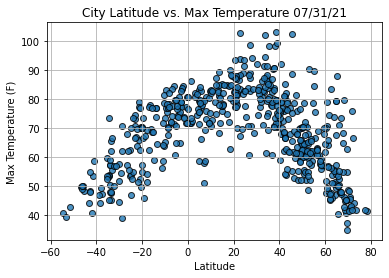

In [13]:
# Import time module to format the date
import time

# Build the scatter plot for latitude vs. max temperature. Using the date from the data frame.
# x axis, y axis, black color, line, marker, transparency, label
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Title
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x")
#Y axis
plt.ylabel("Max Temperature (F)")
#X axis
plt.xlabel("Latitude")
#Grid          
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### plots for latitude vs. humidity

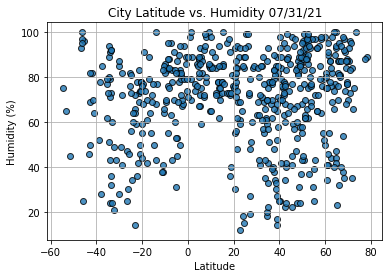

In [15]:
# Build the scatter plots for latitude vs. humidity.
#Using the date from the data frame: Latitude vs. Humidity
# x axis, y axis, black color, line, marker, transparency, label
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Title
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
# y axis
plt.ylabel("Humidity (%)")
# x axis
plt.xlabel("Latitude")
#Grid
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### plots for latitude vs. cloudiness.

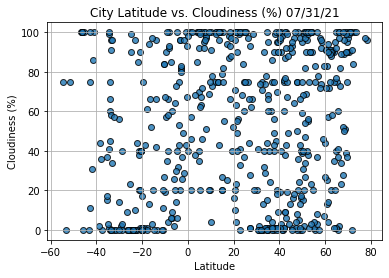

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
#Using the date from the data frame: Latitude vs. Humidity
# x axis, y axis, black color, line, marker, transparency, label
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#Title
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
#Y axis
plt.ylabel("Cloudiness (%)")
#X axis
plt.xlabel("Latitude")
#Grid
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### plots for latitude vs. wind speed

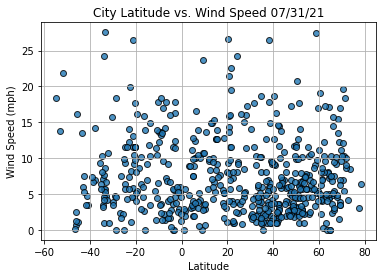

In [17]:
# Build the scatter plots for latitude vs. wind speed.
#Using the date from the data frame: Latitude vs. Humidity
# x axis, y axis, black color, line, marker, transparency, label
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()